# Naïve Bayes Classifier Algorithm of Sale of a Brand Car
<img src= "https://i.postimg.cc/CLRdTJ2G/Chat-GPT-Image-Aug-20-2025-11-04-14-PM.png" width="1000" height="400">
It is a collection of data showing the sale of a brand car among different customers and their responses.It is a supervised learning data. We can use this data for classification purpose ,and also many classification algorithms such as Naive bayes classifier , Decision tree , logistic Regression can be applied on it for the future prediction. It is a typical data helpful to understand the behaviour of customers

Problem Statement :

Car companies and dealerships aim to maximize their sales by understanding customer behavior and satisfaction levels. The dataset contains details such as Gender, Age, Estimated Salary, Purchase history, and Satisfaction levels of customers.

The key problem is to predict whether a customer is likely to purchase a car based on demographic and financial attributes, and to analyze how customer satisfaction influences purchase decisions.

This problem is a binary classification task where the target variable is Purchased (0 = No, 1 = Yes). Insights from this analysis can help businesses:

Identify the key factors (age, gender, salary, satisfaction) that influence purchasing decisions.

Develop targeted marketing strategies for potential buyers.

Improve customer satisfaction to increase sales conversions.

Optimize dealership resources by focusing on high-potential customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [17]:
df = pd.read_csv("kaggle sale.csv")
df.drop("User ID", axis=1, inplace=True)

In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns (Gender, satisfied)
for col in ["Gender", "satisfied "]:
    df[col] = LabelEncoder().fit_transform(df[col])
print(df[col])

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: satisfied , Length: 400, dtype: int64


In [36]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]
print(X,y)

     Gender  Age  EstimatedSalary  satisfied 
0         1   19            19000           0
1         1   35            20000           0
2         0   26            43000           0
3         0   27            57000           0
4         1   19            76000           0
..      ...  ...              ...         ...
395       0   46            41000           1
396       1   51            23000           1
397       0   50            20000           1
398       1   36            33000           1
399       0   49            36000           1

[400 rows x 4 columns] 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.02020406 -1.78179743 -1.49004624 -1.73205081]
 [ 1.02020406 -0.25358736 -1.46068138 -1.73205081]
 [-0.98019606 -1.11320552 -0.78528968 -1.73205081]
 ...
 [-0.98019606  1.17910958 -1.46068138  0.57735027]
 [ 1.02020406 -0.15807423 -1.07893824  0.57735027]
 [-0.98019606  1.08359645 -0.99084367  0.57735027]]


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

[[-0.98019606 -1.01769239 -0.37418169 -1.73205081]
 [ 1.02020406  0.79705706 -1.22576253 -1.73205081]
 [-0.98019606  0.12846516  1.88691227  0.57735027]
 ...
 [-0.98019606  0.51051768  1.85754742  0.57735027]
 [ 1.02020406  0.12846516  0.21311545  0.57735027]
 [-0.98019606 -0.54012675  0.47739916  0.57735027]] [[-0.98019606  0.79705706 -1.40195167  0.57735027]
 [-0.98019606  2.03872775  0.53612887  0.57735027]
 [-0.98019606 -0.92217926 -0.75592482 -1.73205081]
 [-0.98019606  0.98808332  0.77104772  0.57735027]
 [-0.98019606 -0.82666613 -1.22576253 -1.73205081]
 [-0.98019606 -0.73115301 -0.2273574  -1.73205081]
 [-0.98019606  0.89257019  1.09406114  0.57735027]
 [-0.98019606 -0.82666613  0.38930459 -1.73205081]
 [ 1.02020406  0.22397829  0.15438573  0.57735027]
 [ 1.02020406  0.41500455 -0.13926283  0.57735027]
 [-0.98019606 -0.25358736 -0.13926283 -1.73205081]
 [-0.98019606  1.46564897 -1.04957339  0.57735027]
 [-0.98019606 -1.39974491 -0.63846539 -1.73205081]
 [-0.98019606 -1.6862843 

In [42]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred))

GaussianNB Accuracy: 0.925


In [45]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))


BernoulliNB Accuracy: 0.7875


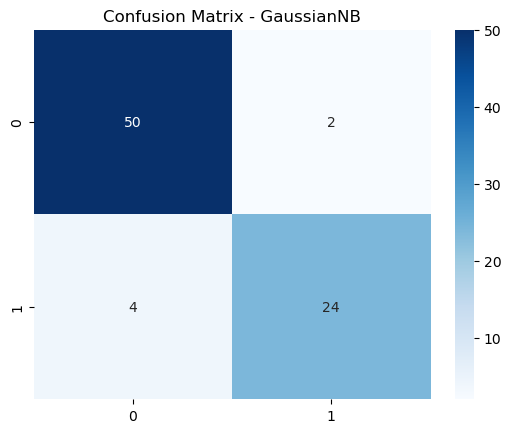

In [46]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - GaussianNB")
plt.show()

In [47]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.92      0.86      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.91      0.92        80
weighted avg       0.92      0.93      0.92        80



In [48]:
scores = cross_val_score(gnb, X_scaled, y, cv=5)
print("Cross Validation Mean Accuracy:", scores.mean())

Cross Validation Mean Accuracy: 0.8625


In [49]:
y_prob = gnb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

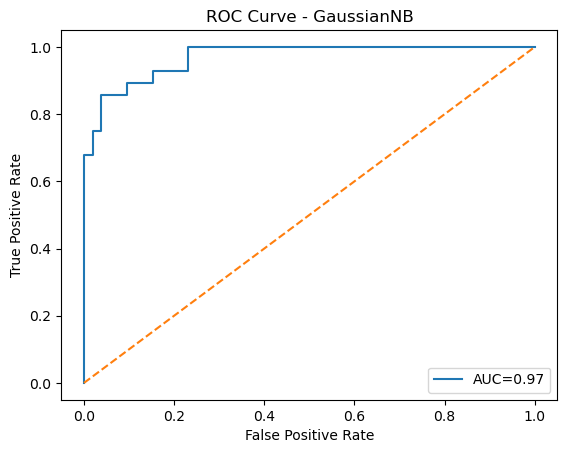

In [50]:
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GaussianNB")
plt.legend()
plt.show()

In [51]:
new_data = scaler.transform([[1, 30, 50000, 1]])  # Gender=1, Age=30, Salary=50k, satisfied=1
print("Prediction (1=Purchase):", gnb.predict(new_data))

Prediction (1=Purchase): [0]


C:\Users\rajul\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


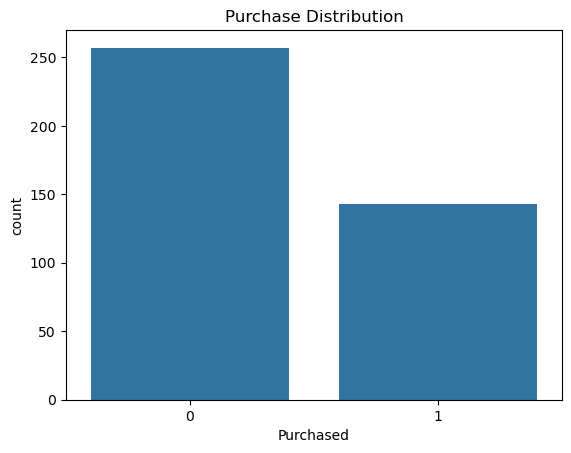

In [52]:
sns.countplot(x="Purchased", data=df)
plt.title("Purchase Distribution")
plt.show()

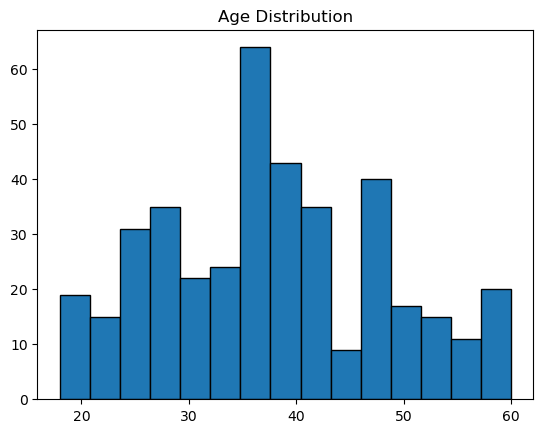

In [53]:
plt.hist(df["Age"], bins=15, edgecolor="black")
plt.title("Age Distribution")
plt.show()


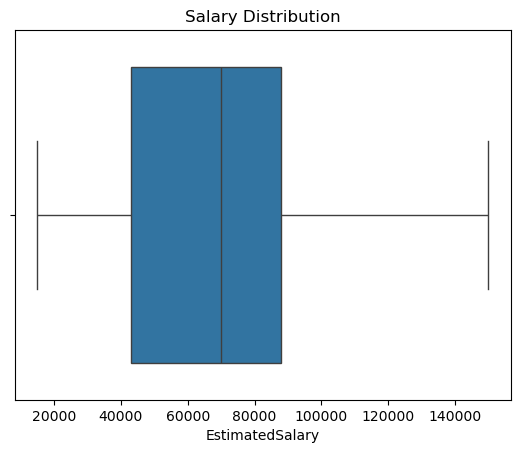

In [54]:
sns.boxplot(x=df["EstimatedSalary"])
plt.title("Salary Distribution")
plt.show()

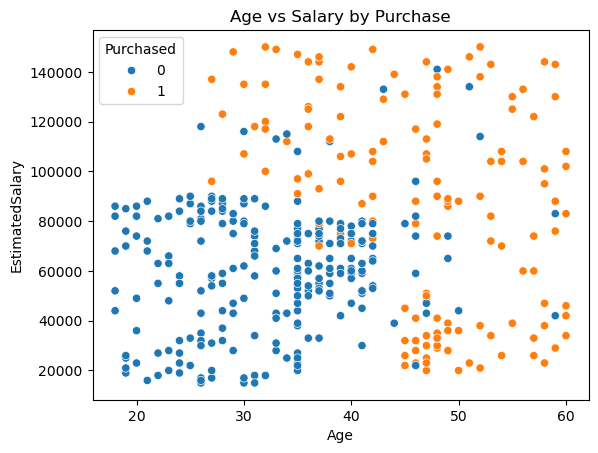

In [55]:
sns.scatterplot(x="Age", y="EstimatedSalary", hue="Purchased", data=df)
plt.title("Age vs Salary by Purchase")
plt.show()

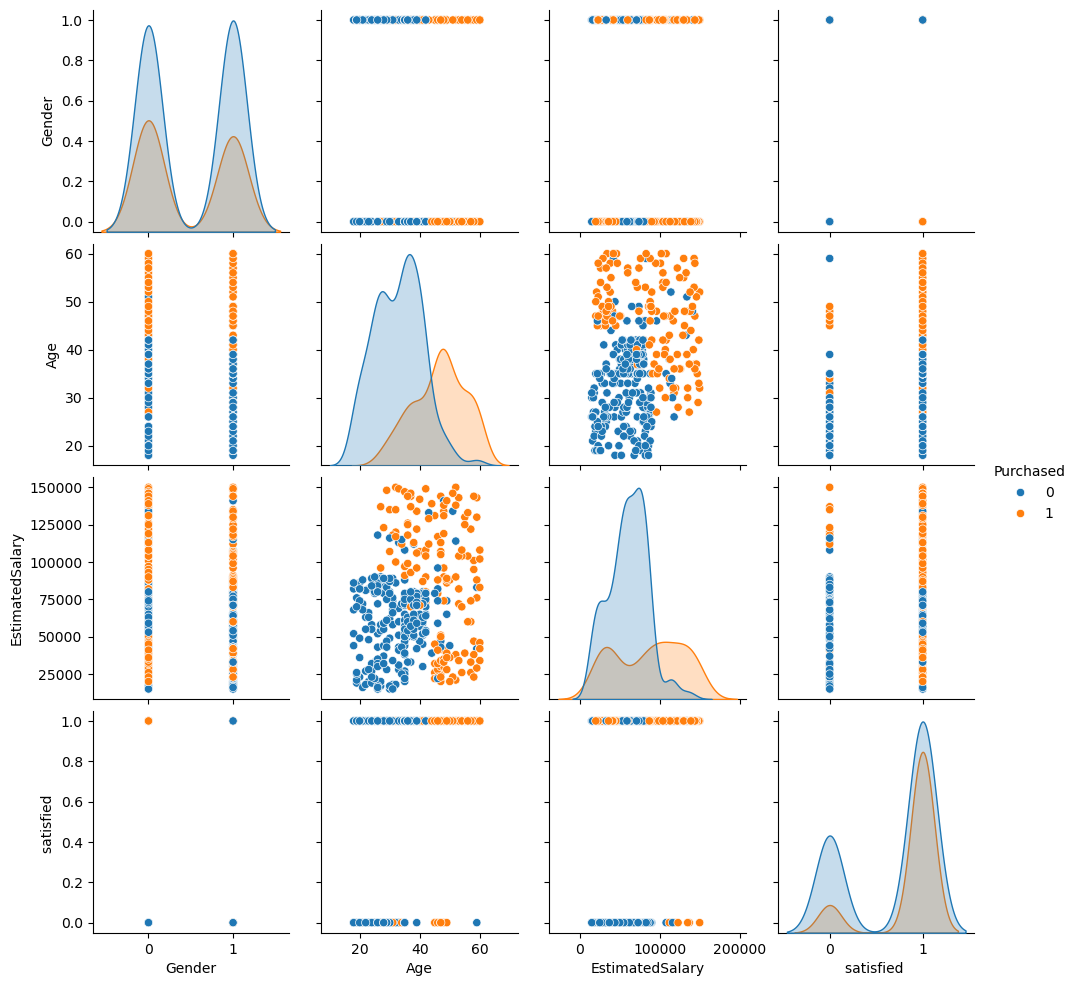

In [56]:
sns.pairplot(df, hue="Purchased")
plt.show()

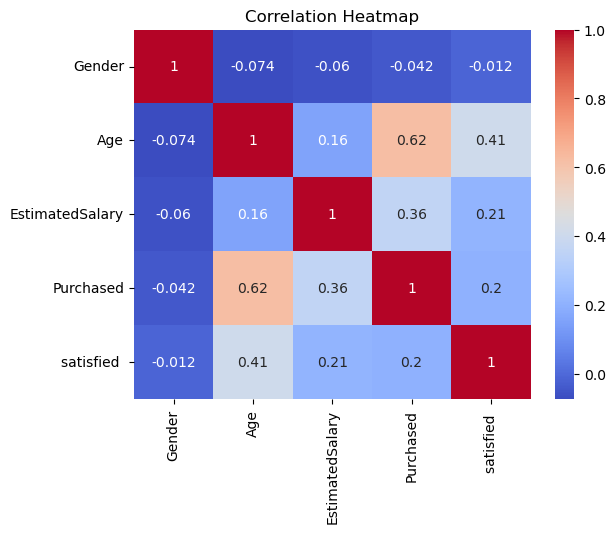

In [57]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

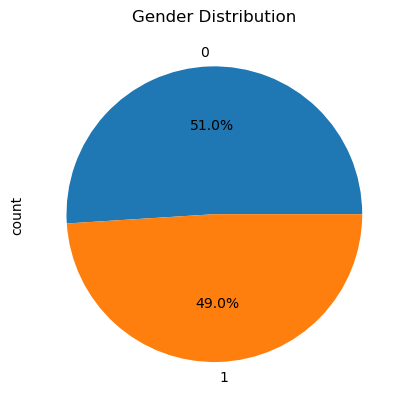

In [58]:
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()

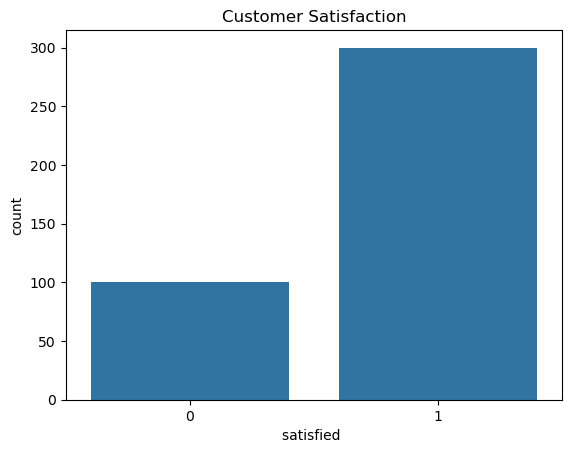

In [60]:
sns.countplot(x="satisfied ", data=df)
plt.title("Customer Satisfaction")
plt.show()

C:\Users\rajul\AppData\Local\Temp\ipykernel_19068\972814457.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Age"], shade=True)


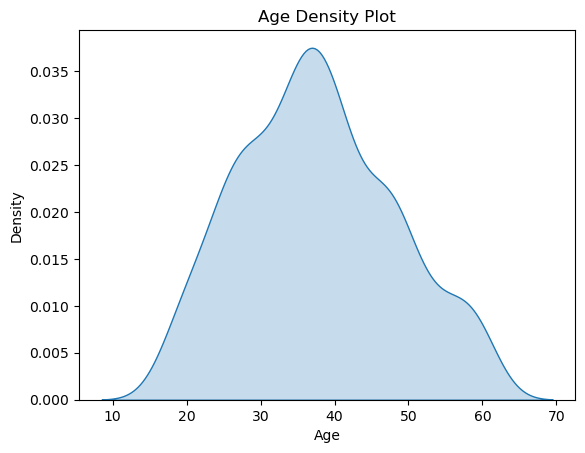

In [61]:
sns.kdeplot(df["Age"], shade=True)
plt.title("Age Density Plot")
plt.show()

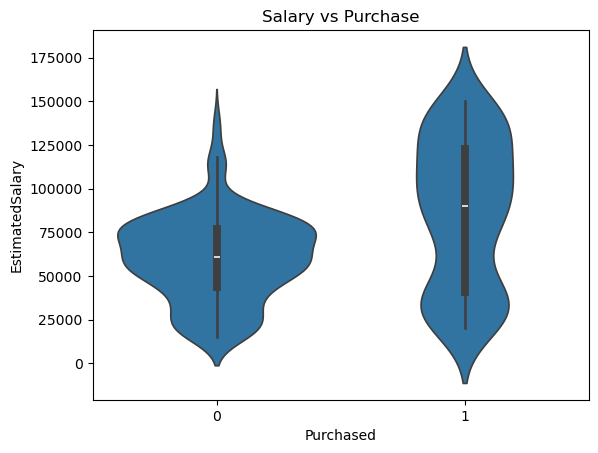

In [62]:
sns.violinplot(x="Purchased", y="EstimatedSalary", data=df)
plt.title("Salary vs Purchase")
plt.show()


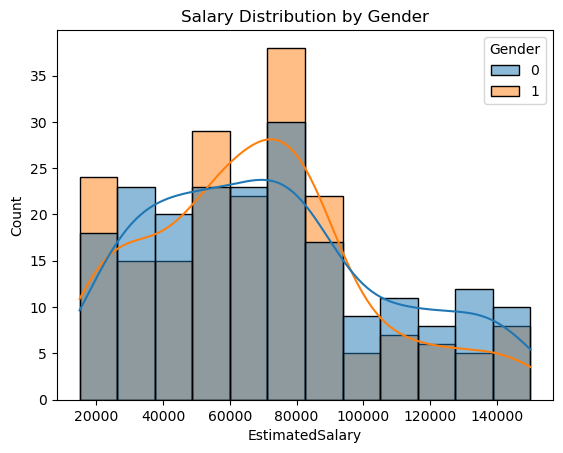

In [63]:
sns.histplot(data=df, x="EstimatedSalary", hue="Gender", kde=True)
plt.title("Salary Distribution by Gender")
plt.show()

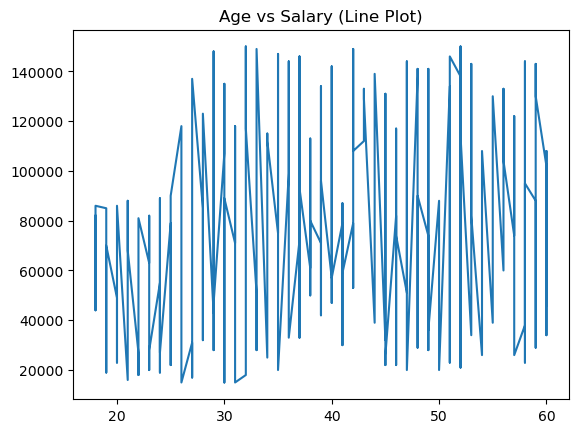

In [64]:
df_sorted = df.sort_values("Age")
plt.plot(df_sorted["Age"], df_sorted["EstimatedSalary"])
plt.title("Age vs Salary (Line Plot)")
plt.show()

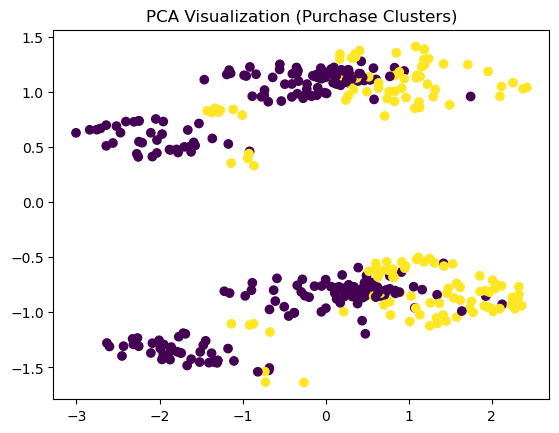

In [67]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis")
plt.title("PCA Visualization (Purchase Clusters)")
plt.show()

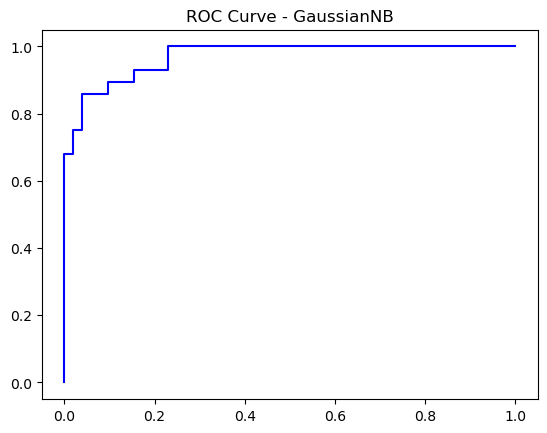

In [68]:
plt.plot(fpr, tpr, color="blue")
plt.title("ROC Curve - GaussianNB")
plt.show()

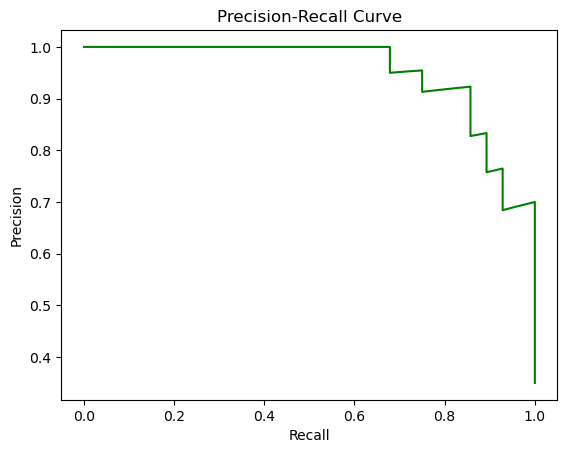

In [69]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()